In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import scipy.io

In [89]:
matrix = scipy.io.loadmat('ex3data1.mat')
X = matrix['X']
Y = matrix['y']
X.shape, Y.shape

((5000, 400), (5000, 1))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


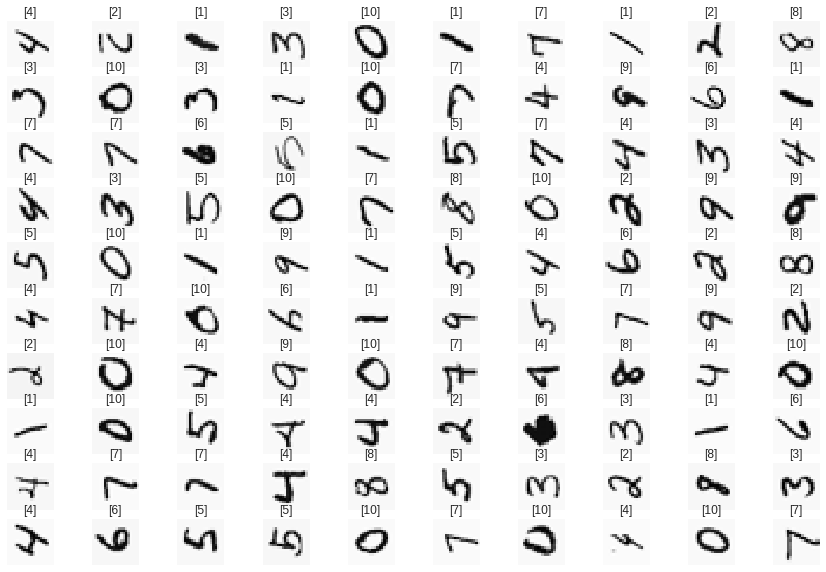

In [91]:
## plots  n by n images at random from the given matrix 
def display_digits(X,Y,n=10):
  
  fig = plt.figure()
  fig.set_size_inches(15,10)

 
  indices = np.random.randint(low=0,high=len(X),size=n*n)  # selects n by n indices at random
  for i,index in enumerate(indices):
    image = X[index,:].reshape((20,20)) # reshape the ravelled image into 20,20 image size
    ax = plt.subplot(n,n,i+1) # plot the image at the particular index 
    ax.imshow(image,origin='lower') 
    ax.set_title(Y[index]) # set the labelled variable from Y matrix
    # turn off both the axis ticks 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False)
    
display_digits(X,Y)

## 2. Neural Network (1 Hidden Layers with 25  units)

In [90]:
# load the predetermined weights 
weights = scipy.io.loadmat('ex3weights.mat')
wt1 = weights['Theta1'] 
wt2 = weigths['Theta2']

wt1.shape, wt2.shape

((25, 401), (10, 26))

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [93]:
# adding a bias weight in the X matrix
ones = np.ones(shape=(X.shape[0],1))
X1 = np.concatenate((ones,X),axis=1)
X1.shape

(5000, 401)

In [94]:
# 1st layer feed forward
h1 = np.dot(X1,wt1.T)
a1 = sigmoid(h1)
# add a bias term in the new activated layer
ones = np.ones(shape=(a1.shape[0],1))
a1 = np.concatenate((ones,a1),axis=1)

# 2nd layer feed forward
h2 = np.dot(a1,wt2.T)
a2 = sigmoid(h2)
a2.shape

(5000, 10)

In [99]:
a2[1]

array([4.79026796e-04, 2.41495958e-03, 3.44755685e-03, 4.05616281e-05,
       6.53412433e-03, 1.75930169e-03, 1.15788527e-02, 2.39107046e-03,
       1.97025086e-03, 9.95696931e-01])

In [0]:
# prediction
Y_pred =  []
for i in range(X.shape[0]):
  l = list(a2[i])
  output = l.index(np.max(l))+1
  Y_pred.append(output)

In [101]:
# evaluation
accuracy_score(Y,Y_pred)

0.9752